### Exploring Data

In [127]:
import numpy as np
import pandas as pd

In [128]:
df=pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

#### 6.1 A First Glimpse at the Data

In [129]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [130]:
df.sample(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
585,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+2,37,Once a month,Male
407,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,60,Once a year,Male
246,No,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,-3,52,Every three months,Female
1027,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,+3,65,Every three months,Female
531,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,0,38,Once a month,Female


#### 6.2 Data Cleaning

In [131]:
df.shape

(1453, 15)

In [132]:
# Statistical info of the data
df.describe(include='O')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


In [133]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [134]:
# Check for null values
df.isnull().sum()

# There is no null value

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [135]:
# Check for duplicate entries
df.duplicated().sum()

22

In [136]:
# Dropping duplicate entries
df.drop_duplicates(inplace=True)

In [137]:
df.shape

(1431, 15)

In [138]:
df['yummy'].value_counts()

Yes    786
No     645
Name: yummy, dtype: int64

In [139]:
df['convenient'].value_counts()

Yes    1298
No      133
Name: convenient, dtype: int64

In [140]:
df['spicy'].value_counts()

No     1295
Yes     136
Name: spicy, dtype: int64

In [141]:
df['fattening'].value_counts()

Yes    1240
No      191
Name: fattening, dtype: int64

In [142]:
df['greasy'].value_counts()

Yes    754
No     677
Name: greasy, dtype: int64

In [143]:
df['fast'].value_counts()

Yes    1286
No      145
Name: fast, dtype: int64

In [144]:
df['tasty'].value_counts()

Yes    919
No     512
Name: tasty, dtype: int64

In [145]:
df['expensive'].value_counts()

No     915
Yes    516
Name: expensive, dtype: int64

In [146]:
df['healthy'].value_counts()

No     1144
Yes     287
Name: healthy, dtype: int64

In [147]:
df['disgusting'].value_counts()

No     1081
Yes     350
Name: disgusting, dtype: int64

In [148]:
df['Like'].value_counts()

# Like ranges from -5 to 5

+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: Like, dtype: int64

In [149]:
df['VisitFrequency'].value_counts()

Once a month             427
Every three months       339
Once a year              252
Once a week              232
Never                    128
More than once a week     53
Name: VisitFrequency, dtype: int64

In [150]:
df['Gender'].value_counts()

Female    772
Male      659
Name: Gender, dtype: int64

In [151]:
df['Like'].value_counts()

+3              225
+2              180
0               168
+4              156
+1              152
I hate it!-5    150
I love it!+5    140
-3               73
-4               70
-2               59
-1               58
Name: Like, dtype: int64

#### Descriptive Analysis                                                 

#### Data Preprocessing for Categorical Variables

In [152]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
categorical_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 
                    'healthy', 'disgusting', 'VisitFrequency', 'Gender']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [153]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1


In [154]:
import re

# Remove strings associated with numbers and extract numbers only
df['Like'] = df['Like'].apply(lambda x: int(re.search(r'[-+]?\d+', x).group()))

In [155]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


In [156]:
df['Like'].value_counts()

 3    225
 2    180
 0    168
 4    156
 1    152
-5    150
 5    140
-3     73
-4     70
-2     59
-1     58
Name: Like, dtype: int64

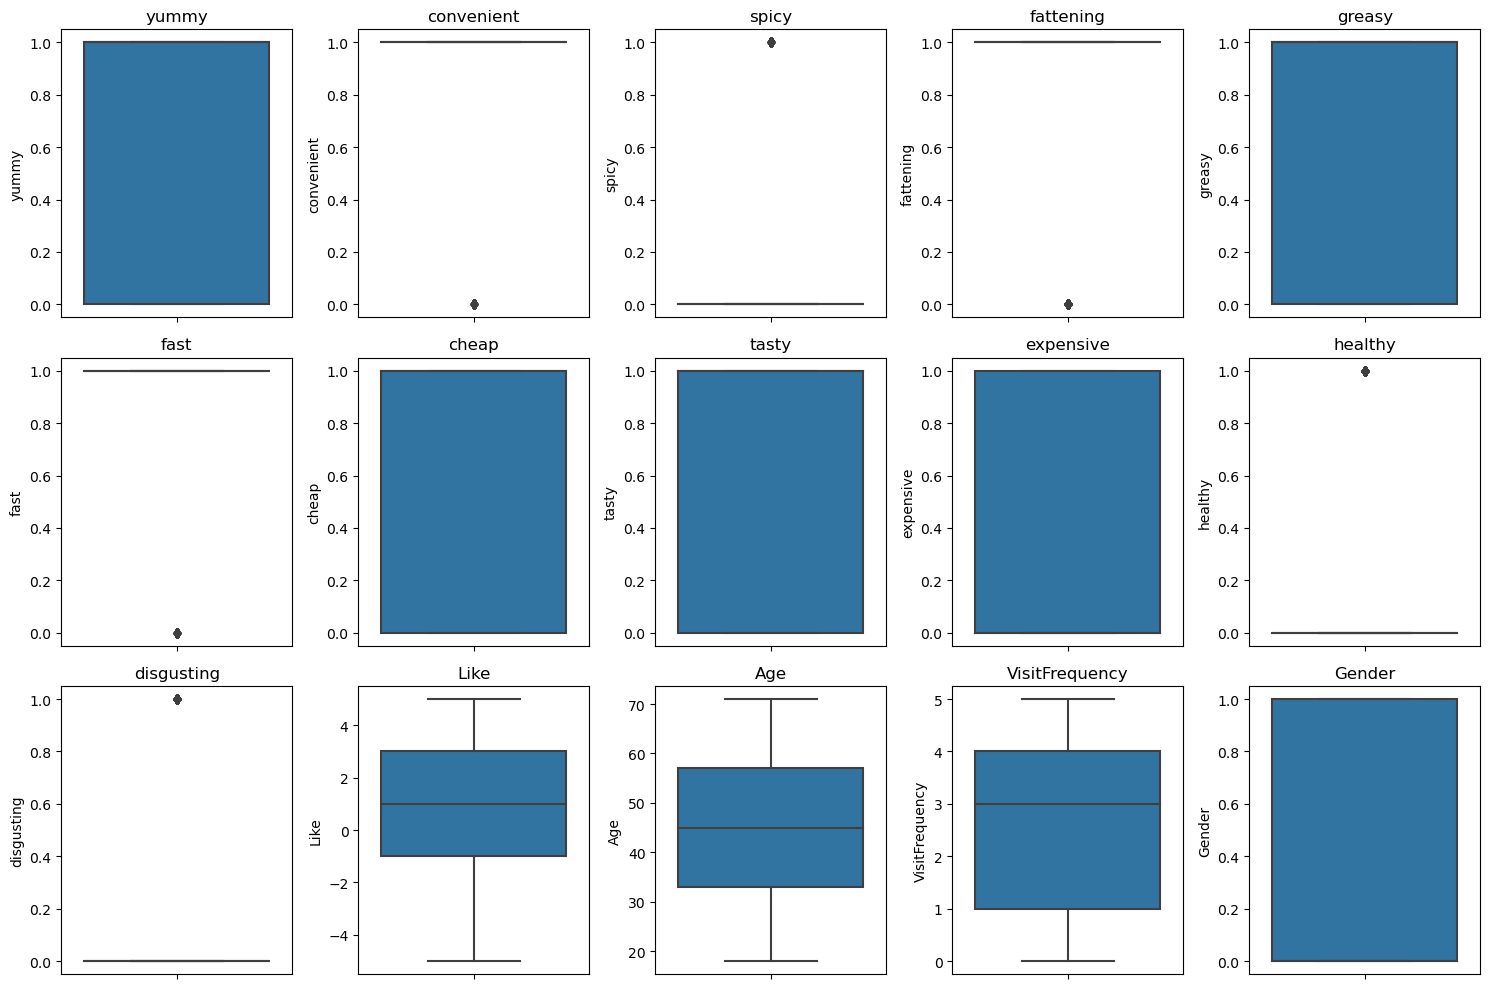

In [157]:
# Check for outliers

import seaborn as sns

# Plot boxplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':  # Check if the column is numerical
        plt.subplot(3, 5, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)

plt.tight_layout()
plt.show()

#### Data Preprocessing for Numerical Variables

In [158]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select columns to be scaled
columns_to_scale = ['Like', 'Age', 'VisitFrequency']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [159]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-1.206517,1.151424,-1.497870,0
1,1,1,0,1,1,1,1,1,1,0,0,0.398359,0.446923,-1.497870,0
2,0,1,1,1,1,1,0,1,1,1,0,0.077384,1.221874,-1.497870,0
3,1,1,0,1,1,1,1,1,0,0,1,1.040309,1.715025,0.771534,0
4,0,1,0,1,1,1,1,0,0,1,0,0.398359,0.306022,0.204183,1


#### Principal Component Analysis

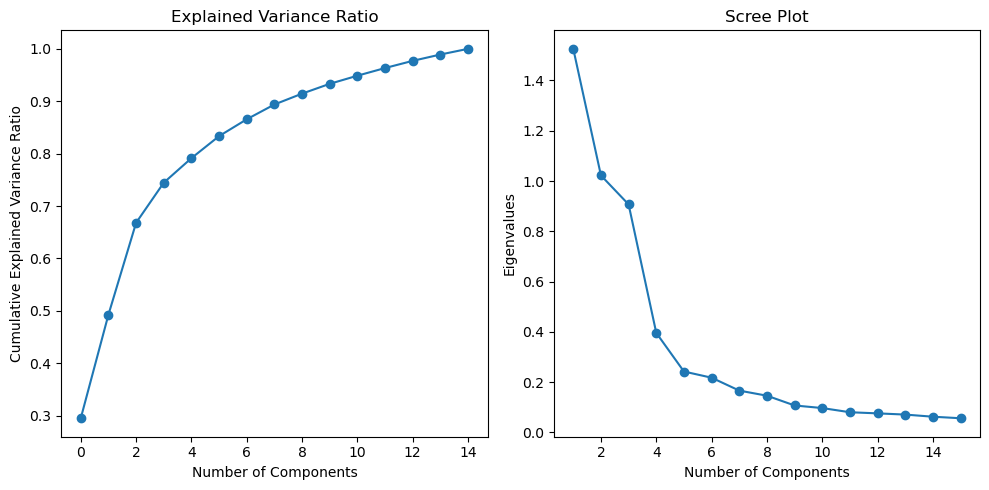

In [160]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(df)

# Plot Explained Variance Ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio')

# Plot Scree Plot
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')

plt.tight_layout()
plt.show()

In [161]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=8)  # Specify the number of components you want to reduce to
principal_components = pca.fit_transform(df)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.634959,1.639258,0.117868,-0.163087,-0.331522,0.569756,-0.325932,0.194779
1,-0.390641,1.541674,0.222487,0.107894,-0.718528,-0.578164,0.107455,0.190952
2,0.500527,1.813646,-0.200571,0.777726,-0.747998,-0.327100,0.557208,-0.593594
3,-0.070396,0.024716,-1.860525,-0.156040,-0.686752,-1.102580,0.089362,-0.235752
4,0.063141,-0.049826,-0.394636,-0.366707,0.592777,-0.381553,-0.110666,-1.102455
...,...,...,...,...,...,...,...,...
1426,2.160815,-1.566203,0.473449,0.735488,0.259798,-0.136629,0.187931,-0.012021
1427,-0.963640,-0.744904,-0.380838,-0.440498,-0.172346,0.676638,0.582364,0.026498
1428,-0.535202,0.152197,-0.768013,0.942681,-0.638497,0.254161,-0.227707,0.413631
1429,-1.410478,1.565780,0.032344,-0.245931,0.881979,0.453854,0.572178,-0.332521


#### Checklist